In [1]:
from collections import Counter
import seaborn as sns
import squarify

sns.set()

In [27]:
barc_pmids = []
barc_journals = []
barc_year = []
barc_organisms = []
barc_common_names = []
barc_countries = []
barc_biomes = []
barc_tech = []
barc_sample_microenv = []
barc_hotwords = []
barc_term_ids = []
barc_term_ids_counts = []

barc_samples = {}

with open("data/clean_relevant_metadata_barcuid", "r") as handle:
    for line in handle:
        line = line.strip("\n").split("\t")
        sample_vals = line[1:4]
        sample_vals.extend(line[5:])
        barc_samples[line[0]] = sample_vals
        barc_pmids.append(line[0])
        barc_journals.append(line[1])
        barc_year.append(line[2])
        barc_organisms.extend(line[3].split(","))
        barc_common_names.extend(list(dict.fromkeys(line[4].split(","))))
        barc_countries.extend(line[5].split(","))
        barc_biomes.extend(line[6].split(","))
        barc_tech.extend(line[7].split(","))
        barc_sample_microenv.extend(line[8].split(","))
        barc_hotwords.extend(line[9].split(","))
        barc_term_ids.append(line[10].split(","))
        barc_term_ids_counts.extend(line[10].split(","))
    
pmids = []
journals = []
year = []
organisms = []
countries = []
biomes = []
tech = []
sample_microenv = []
hotwords = []
term_ids = []
term_ids_counts = []

edna_samples = {}

with open("data/clean_relevant_metadata", "r") as handle:
    for line in handle:
        line = line.strip("\n").split("\t")
        #edna_samples.append(line)
        edna_samples[line[0]] = line[1:]
        pmids.append(line[0])
        journals.append(line[1])
        year.append(line[2])
        organisms.extend(line[3].split(","))
        countries.extend(line[4].split(","))
        biomes.extend(line[5].split(","))
        tech.extend(line[6].split(","))
        sample_microenv.extend(line[7].split(","))
        hotwords.extend(line[8].split(","))
        term_ids.append(line[9].split(","))
        term_ids_counts.extend(line[9].split(","))

excl_edna_pmids = [pmid for pmid in pmids if pmid in barc_pmids]
#excl_edna_pmids = [pmid for idx, pmid in enumerate(pmids) if "D058893" not in term_ids[idx]]
#excl_edna_journals = [journal for idx, journal in enumerate(journals) if "D058893" not in term_ids[idx]]
#excl_edna_year = [yr for idx, yr in enumerate(year) if "D058893" not in term_ids[idx]]

term_names = {}
with open("data/mesh_data.tab", "r") as handle:
    for line in handle:
        line = line.strip("\n").split("\t")
        term_names[line[0]] = line[1]
        
#combined_samples = barc_samples
#combined_samples.update(edna_samples)
combined_samples = {**edna_samples, **barc_samples}
#test = [pmid for pmid in combined_samples.keys() if pmid in pmids]
#test2 = [pmid for pmid in combined_samples.keys() if pmid in barc_pmids]
comb_journals = []
comb_year = []
comb_organisms = []
comb_countries = []
comb_biomes = []
comb_tech = []
comb_sample_microenv = []
comb_hotwords = []
comb_term_ids = []
comb_term_ids_counts = []

for samp in combined_samples:
    samp = combined_samples[samp]
    comb_journals.append(samp[0])
    comb_year.append(samp[1])
    comb_organisms.extend(samp[2].split(","))
    comb_countries.extend(samp[3].split(","))
    comb_biomes.extend(samp[4].split(","))
    comb_tech.extend(samp[5].split(","))
    comb_sample_microenv.extend(samp[6].split(","))
    comb_hotwords.extend(samp[7].split(","))
    comb_term_ids.append(samp[8].split(","))
    comb_term_ids_counts.extend(samp[8].split(","))

In [28]:
print(len(pmids))
print(len(excl_edna_pmids))
#print(len(excl_edna_journals))
#print(len(excl_edna_year))
#print(len(excl_edna_organisms))
#print(len(excl_edna_countries))
#print(len(excl_edna_term_ids))
print(f"barc samples: {len(barc_samples.keys())}")
print(f"edna samples: {len(edna_samples.keys())}")
print(f"combined samples: {len(combined_samples.keys())}")
print(len(test))
print(len(test2))

884
84
barc samples: 3001
edna samples: 884
combined samples: 3801
884
3001


PloS one - 115
Molecular ecology resources - 51
Applied and environmental microbiology - 50
Scientific reports - 39
Molecular ecology - 28
Environmental science &amp; technology - 24
Environmental microbiology - 22
Ecology and evolution - 21
Proceedings of the National Academy of Sciences of the United States of America - 17
Methods in molecular biology (Clifton, N.J.) - 16
Applied microbiology and biotechnology - 13
Frontiers in microbiology - 13
Journal of microbiological methods - 12
FEMS microbiology letters - 11
PeerJ - 11
The Journal of eukaryotic microbiology - 9
The ISME journal - 9
FEMS microbiology ecology - 9
Protist - 9
Genome - 8


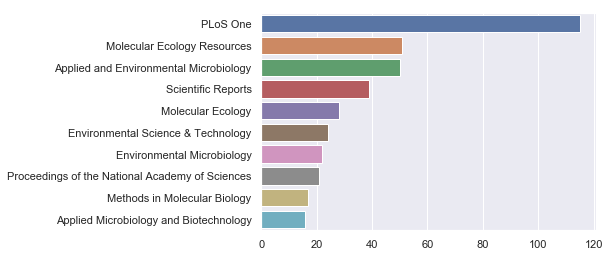

In [29]:
# articles mentioning eDNA
curr_list = journals
curr_list = Counter(curr_list)
sum_tot = sum([val for key, val in curr_list.items()])
#curr_list = [[key, val / sum_tot] for key, val in curr_list.items()]
curr_list = [[key, val] for key, val in curr_list.items()]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")
    
curr_list[0][0] = "PLoS One"
curr_list[1][0] = "Molecular Ecology Resources"
curr_list[2][0] = "Applied and Environmental Microbiology"
curr_list[3][0] = "Scientific Reports"
curr_list[4][0] = "Molecular Ecology"
curr_list[5][0] = "Environmental Science & Technology"
curr_list[6][0] = "Environmental Microbiology"
curr_list[7][0] = "Proceedings of the National Academy of Sciences"
curr_list[8][0] = "Methods in Molecular Biology"
curr_list[9][0] = "Applied Microbiology and Biotechnology"

ax = sns.barplot(x=[item[1] for item in curr_list][0:10], 
                 y=[item[0] for item in curr_list[0:10]])

fig = ax.get_figure()
fig.savefig("journals_bar_ednaonly.png", bbox_inches="tight", dpi=600)

PloS one - 574
Molecular ecology resources - 276
Scientific reports - 154
Zootaxa - 143
Mitochondrial DNA. Part A, DNA mapping, sequencing, and analysis - 124
Molecular ecology - 96
Genome - 93
Methods in molecular biology (Clifton, N.J.) - 73
Zhongguo Zhong yao za zhi = Zhongguo zhongyao zazhi = China journal of Chinese materia medica - 69
Applied and environmental microbiology - 63
Mitochondrial DNA - 49
Molecular phylogenetics and evolution - 45
Proceedings of the National Academy of Sciences of the United States of America - 44
Genetics and molecular research : GMR - 44
Parasites &amp; vectors - 32
Environmental microbiology - 31
Acta tropica - 31
Journal of fish biology - 29
Nature communications - 26
Bulletin of entomological research - 26


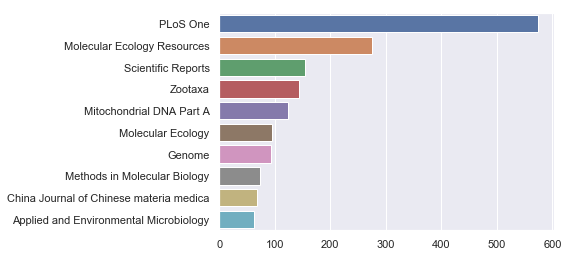

In [30]:
curr_list = comb_journals

# articles indexed with "barcoding"
curr_list = Counter(curr_list)
sum_tot = sum([val for key, val in curr_list.items()])
#curr_list = [[key, val / sum_tot] for key, val in curr_list.items()]
curr_list = [[key, val] for key, val in curr_list.items()]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

curr_list[0][0] = "PLoS One"
curr_list[1][0] = "Molecular Ecology Resources"
curr_list[2][0] = "Scientific Reports"
curr_list[3][0] = "Zootaxa"
curr_list[4][0] = "Mitochondrial DNA Part A"
curr_list[5][0] = "Molecular Ecology"
curr_list[6][0] = "Genome"
curr_list[8][0] = "China Journal of Chinese materia medica"
curr_list[7][0] = "Methods in Molecular Biology"
curr_list[9][0] = "Applied and Environmental Microbiology"

ax = sns.barplot(x=[item[1] for item in curr_list][0:10], 
                 y=[item[0] for item in curr_list[0:10]])

fig = ax.get_figure()
fig.savefig("journals_bar_barcodandedna.png", bbox_inches="tight", dpi=600)

In [31]:
# "edna"
curr_list = year
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[0], reverse=True)

for item in curr_list[0:30]:
    print(f"{item[0]} - {item[1]}")

2019 - 112
2018 - 111
2017 - 99
2016 - 99
2015 - 49
2014 - 50
2013 - 39
2012 - 40
2011 - 27
2010 - 31
2009 - 34
2008 - 25
2007 - 23
2006 - 21
2005 - 27
2004 - 17
2003 - 18
2002 - 12
2001 - 14
2000 - 6
1999 - 4
1998 - 2
1997 - 5
1995 - 3
1994 - 1
1993 - 1
1992 - 1


2019 - 158
2018 - 395
2017 - 430
2016 - 485
2015 - 371
2014 - 293
2013 - 300
2012 - 289
2011 - 191
2010 - 57
2009 - 3
2008 - 1


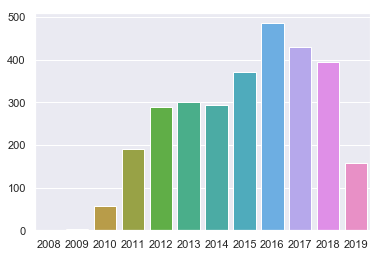

In [32]:
# "barcoding"
curr_list = barc_year
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[0], reverse=True)

for item in curr_list[0:30]:
    print(f"{item[0]} - {item[1]}")

vals = [item[1] for item in curr_list]
years = [item[0] for item in curr_list]
sns.barplot(x=years, y=vals)

2019 - 259
2018 - 487
2017 - 507
2016 - 565
2015 - 415
2014 - 341
2013 - 338
2012 - 324
2011 - 218
2010 - 88
2009 - 37
2008 - 26
2007 - 23
2006 - 21
2005 - 27
2004 - 17
2003 - 18
2002 - 12
2001 - 14
2000 - 6
1999 - 4
1998 - 2
1997 - 5
1995 - 3
1994 - 1
1993 - 1
1992 - 1


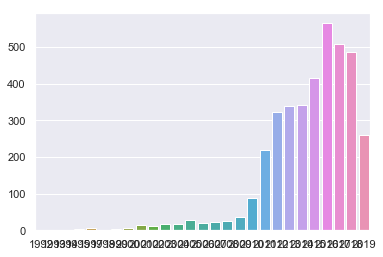

In [33]:
# both
curr_list = comb_year
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[0], reverse=True)

for item in curr_list[0:30]:
    print(f"{item[0]} - {item[1]}")

vals = [item[1] for item in curr_list]
years = [item[0] for item in curr_list]
sns.barplot(x=years, y=vals)

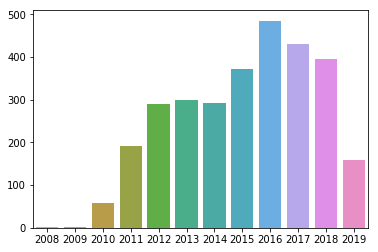

In [8]:
with open("graph_data/years", "w") as out:
    for item in curr_list:
        out.write(",".join([str(item[0]), str(item[1])]))
        out.write("\n")

vals = [item[1] for item in curr_list]
years = [item[0] for item in curr_list]
sns.barplot(x=years, y=vals)

In [6]:
curr_list = organisms

to_remove = ["collection", "metagenome", "environmental samples", "artificial", "metagenomes",
            "plasmid", "indicator", "plasmids", "synthetic", "electron", "microbiota", "unidentified",
            "vectors", "insertion", "california", "transposon", "ammonia", "environmental sequence",
            "integrons", "escherichia", "mock community"]
curr_list = [x for x in curr_list if x and x not in to_remove]
#wordcloud_items = curr_list[0:50]

curr_list = Counter(curr_list)
wordcloud_items = curr_list
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)


for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

bacteria - 116
escherichia coli - 42
proteobacteria - 26
archaea - 19
pseudomonas - 18
foraminifera - 18
cyanobacteria - 17
streptomyces - 16
viruses - 16
gammaproteobacteria - 12
alphaproteobacteria - 11
bacterium - 11
cercozoa - 10
cyprinus - 10
cyprinus carpio - 10
betaproteobacteria - 8
saccharomyces - 8
saccharomyces cerevisiae - 8
hypophthalmichthys - 8
bacillus - 8


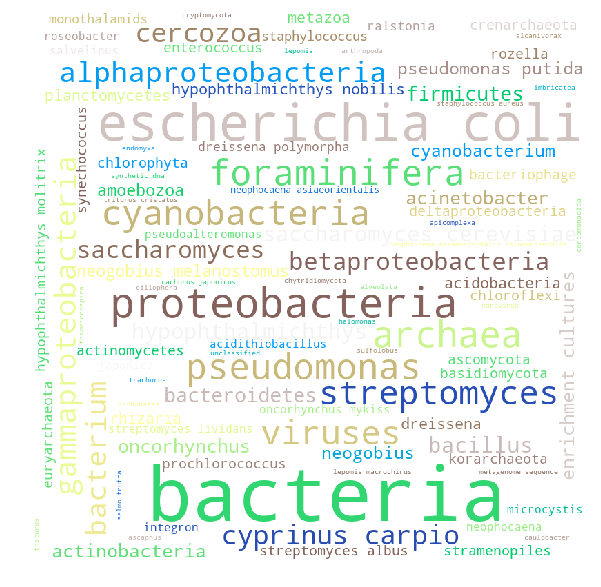

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="terrain",
                      min_font_size=10).fit_words(wordcloud_items)#.generate(",".join(wordcloud_items))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
#plt.show()
plt.savefig("word_cloud.png", dpi=600)

bacteria - 240
diptera - 154
lepidoptera - 88
hymenoptera - 58
escherichia coli - 56
proteobacteria - 54
viruses - 52
coleoptera - 51
hemiptera - 46
archaea - 32
firmicutes - 31
actinobacteria - 31
pseudomonas - 30
cyanobacteria - 30
bacteroidetes - 30
bacillus - 26
saccharomyces - 25
bacterium - 25
nematodes - 25
basidiomycota - 25


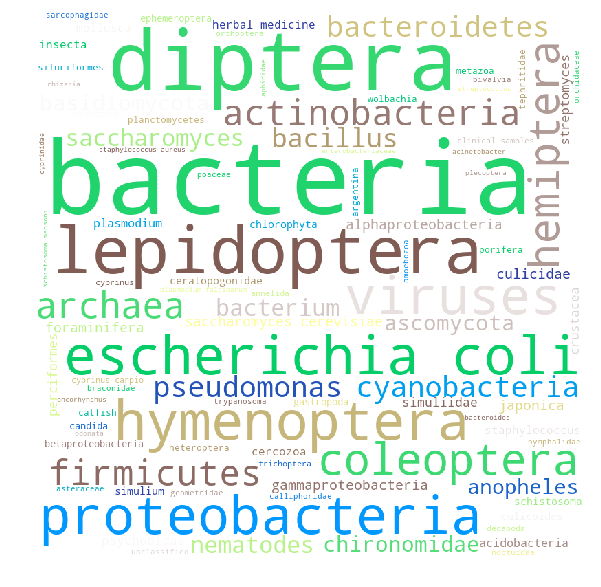

In [45]:
curr_list = comb_organisms

to_remove = ["collection", "metagenome", "environmental samples", "artificial", "metagenomes",
            "plasmid", "indicator", "plasmids", "synthetic", "electron", "microbiota", "unidentified",
            "vectors", "insertion", "california", "transposon", "ammonia", "environmental sequence",
            "integrons", "escherichia", "mock community"]
curr_list = [x for x in curr_list if x and x not in to_remove]
#wordcloud_items = curr_list[0:50]

curr_list = Counter(curr_list)
wordcloud_items = curr_list
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")
    
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="terrain",
                      min_font_size=10).fit_words(wordcloud_items)#.generate(",".join(wordcloud_items))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
#plt.show()
#plt.savefig("word_cloud2.png", dpi=600)


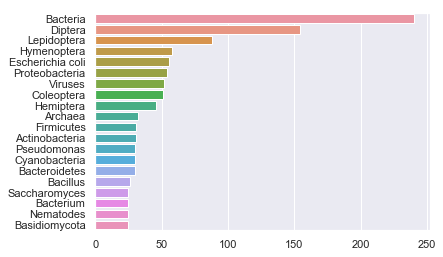

In [49]:
ax = sns.barplot(x=[item[1] for item in curr_list][0:20], 
                 y=[item[0].capitalize() for item in curr_list[0:20]])

fig = ax.get_figure()
fig.savefig("org_names_combined.png", bbox_inches="tight", dpi=600)

In [42]:
#temp = barc_countries
#temp.extend(countries)
temp = comb_countries
#temp = countries
# get code here
# https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv
for idx, country in enumerate(temp):
    if country == "great britain":
        temp[idx] = "uk"
    if country == "united kingdom":
        temp[idx] = "uk"
    if country == "united states":
        temp[idx] = "usa"     

country_codes = {}
with open("data/country_codes", "r") as handle:
    for line in handle:
        line = line.strip("\n").split(",")
        country_codes[line[0]] = line[2]
country_codes["Usa"] = "USA"
country_codes["United states"] = "USA"
country_codes["Uk"] = "GBR"
country_codes["Great britain"] = "GBR"
country_codes["United kingdom"] = "GBR"
country_codes["New zealand"] = "NZL"
country_codes["South africa"] = "ZAF"
country_codes["Bahamas"] = "BHM"
country_codes["Costa rica"] = "CRI"
country_codes["Gbr"] = "GBR"
country_codes["Sri lanka"] = "LKA"
country_codes["Congo"] = "COD"
country_codes["Saudi arabia"] = "SAU"
country_codes["Czech republic"] = "CZE"
country_codes["Micronesia"] = "FSM"
country_codes["Myanmar"] = "MMR"
country_codes["Uae"] = "ARE"
country_codes["Burkina"] = "BFA"

curr_list = temp
for idx, item in enumerate(curr_list):
    item = item.split()
    item = [it.capitalize() for it in item]
    item = " ".join(item)
    curr_list[idx] = item

curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

countries_abbrev = [country_codes[item[0]] for item in curr_list]
countries_full = [item[0] for item in curr_list]

vals = [item[1] for item in curr_list]

with open("data/country_codes", "r") as handle:
    for line in handle:
        line = line.strip("\n").split(",")
        if line[2] not in countries_abbrev:
            countries_abbrev.append(line[2])
            countries_full.append(line[0])
            vals.append(0)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

China - 199
India - 94
Usa - 81
Brazil - 71
Japan - 62
Canada - 61
Australia - 49
Thailand - 43
Mexico - 42
Uk - 33
Malaysia - 28
Italy - 27
Spain - 25
Taiwan - 24
Germany - 24
France - 22
South Africa - 21
Colombia - 19
Philippines - 18
Turkey - 18


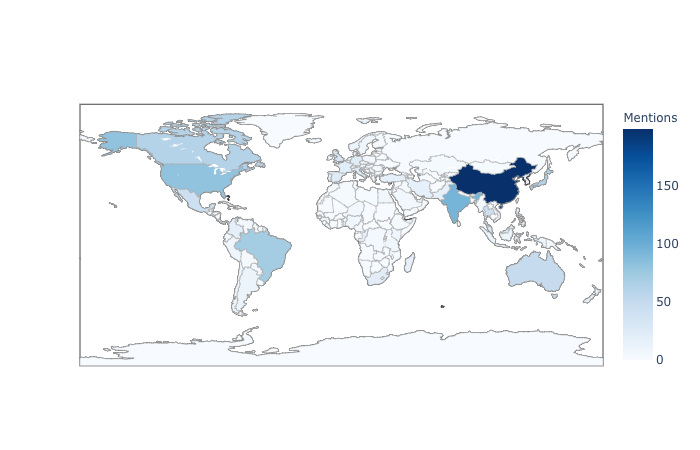

In [51]:
#import plotly.figure_factory as ff
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objects as go
#import pandas as pd
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

fig = go.Figure(data=go.Choropleth(
    #title= "Country Name Mentions in PubMed Articles",
    locations = countries_abbrev,
    z = vals,
    text = countries_full,
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Mentions',
    #lataxis_range=[-40,90]
))
fig.show(renderer="png")
fig.write_image("chloro_combined.png", width=1200, height=800)
#plot(fig, validate=False, filename="Chloro", image="png")
#iplot(fig, validate=False, filename="chloro")
#fig.show()
#fig.savefig("chloro.png", bbox_inches="tight", dpi=600)

marine - 144
freshwater - 100
tropical - 21
forest - 20
mountain - 12
estuary - 8
coral - 8
coral reef - 6
ice - 5
plankton - 4
grassland - 4
desert - 4
estuaries - 3
wetland - 3
marsh - 3
boreal - 3
floodplain - 2
intertidal - 2
rainforest - 2
woodland - 2


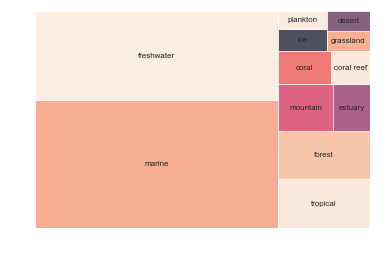

In [44]:
curr_list = biomes
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")
    
squarify.plot(sizes=[item[1] for item in curr_list][0:12], 
              label=[item[0] for item in curr_list][0:12], 
              bar_kwargs={"alpha":.7},
             text_kwargs={"fontsize":8})
#plt.rc("font", size=10)
plt.axis("off")
#plt.show()
#fig = plt.get_figure()
plt.savefig("biomes_treemap_ednaonly.png", bbox_inches="tight", dpi=600)

marine - 292
freshwater - 209
tropical - 135
forest - 110
coral - 33
mountain - 31
plankton - 26
rainforest - 22
coral reef - 17
desert - 14
boreal - 13
estuary - 11
grassland - 11
arid - 11
ice - 9
cave - 8
tundra - 8
marsh - 7
tropical forest - 7
estuaries - 6


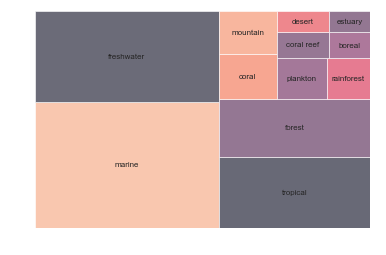

In [54]:
#curr_list = [b for b in barc_biomes]
#curr_list.extend(biomes)
curr_list = comb_biomes
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")
    
squarify.plot(sizes=[item[1] for item in curr_list][0:12], 
              label=[item[0] for item in curr_list][0:12], 
              bar_kwargs={"alpha":.6},
             text_kwargs={"fontsize":8})
#plt.rc("font", size=10)
plt.axis("off")
#plt.show()
#fig = plt.get_figure()
plt.savefig("biomes_treemap_inclbarc.png", bbox_inches="tight", dpi=600)


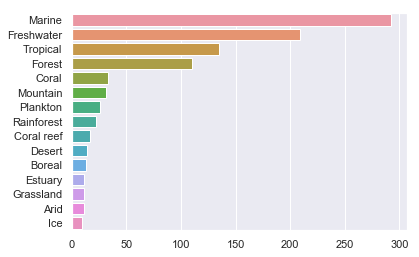

In [75]:
ax = sns.barplot(x=[item[1] for item in curr_list][0:15], 
                 y=[item[0].capitalize() for item in curr_list[0:15]])#,
                #color="lightskyblue")
                 #palette=sns.color_palette("Spectral"))

fig = ax.get_figure()
fig.savefig("biomes_combined.png", bbox_inches="tight", dpi=600)

In [12]:
curr_list = tech
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

pcr - 230
metabarcoding - 127
metagenomic - 102
16s - 97
18s - 40
metagenome - 30
barcoding - 26
coi - 24


In [13]:
curr_list = sample_microenv
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

water - 243
marine - 144
soil - 130
freshwater - 100
sediment - 71
sand - 7
ice - 5
feces - 4
glacial - 2
saltwater - 1


In [14]:
curr_list = hotwords
curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{item[0]} - {item[1]}")

fish - 140
plants - 31
mammals - 17
amphibians - 16
arthropods - 8
birds - 7
insects - 7
reptiles - 5
copepods - 3
bryophytes - 2


In [58]:
curr_list = barc_term_ids
curr_list.extend(term_ids_counts)

curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{term_names[item[0]]} - {item[1]}")

DNA Barcoding, Taxonomic - 1379
Animals - 1029
Phylogeny - 703
Sequence Analysis, DNA - 482
DNA - 363
Biodiversity - 358
Molecular Sequence Data - 330
Species Specificity - 281
Polymerase Chain Reaction - 270
Electron Transport Complex IV - 267
Humans - 225
Genetic Variation - 221
Ecosystem - 215
Base Sequence - 194
RNA, Ribosomal, 16S - 173
DNA, Plant - 160
High-Throughput Nucleotide Sequencing - 160
DNA, Bacterial - 160
Bacteria - 151
DNA, Mitochondrial - 146


Animals - 267
DNA - 237
Phylogeny - 180
Sequence Analysis, DNA - 161
Molecular Sequence Data - 160
Biodiversity - 145
Polymerase Chain Reaction - 135
Ecosystem - 134
DNA, Bacterial - 121
Environmental Monitoring - 113
Bacteria - 103
Metagenomics - 99
RNA, Ribosomal, 16S - 87
DNA Barcoding, Taxonomic - 84
Soil Microbiology - 84
Base Sequence - 75
DNA, Ribosomal - 73
DNA Primers - 71
Gene Library - 71
Geologic Sediments - 64


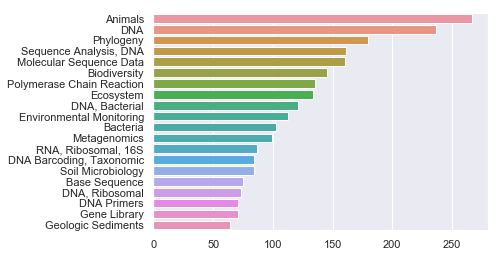

In [70]:
curr_list = term_ids_counts

curr_list = Counter(curr_list)
curr_list = [[key, val] for key, val in curr_list.items() if key]
curr_list = sorted(curr_list, key = lambda curr_list: curr_list[1], reverse=True)

for item in curr_list[0:20]:
    print(f"{term_names[item[0]]} - {item[1]}")

ax = sns.barplot(x=[item[1] for item in curr_list][0:20], 
                 y=[term_names[item[0]] for item in curr_list[0:20]])

fig = ax.get_figure()
fig.savefig("mesh_terms_top20.png", bbox_inches="tight", dpi=600)